# 1. Base de datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
archivo = 'marketing_campaign.xlsx'
df= pd.read_excel(archivo,index_col=0)
# print(df.head(10))

## Limpieza de datos

In [3]:
df.shape

(2240, 28)

In [4]:
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
# Eliminar filas con valores faltantes
df.dropna(inplace=True)
df.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [6]:
#ver si hay datos duplicados
df.duplicated().sum()

182

In [7]:
# Los elimino y me quedo con la primera ocurrencia.
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
df.shape

(2034, 28)

igual para todas las variables:

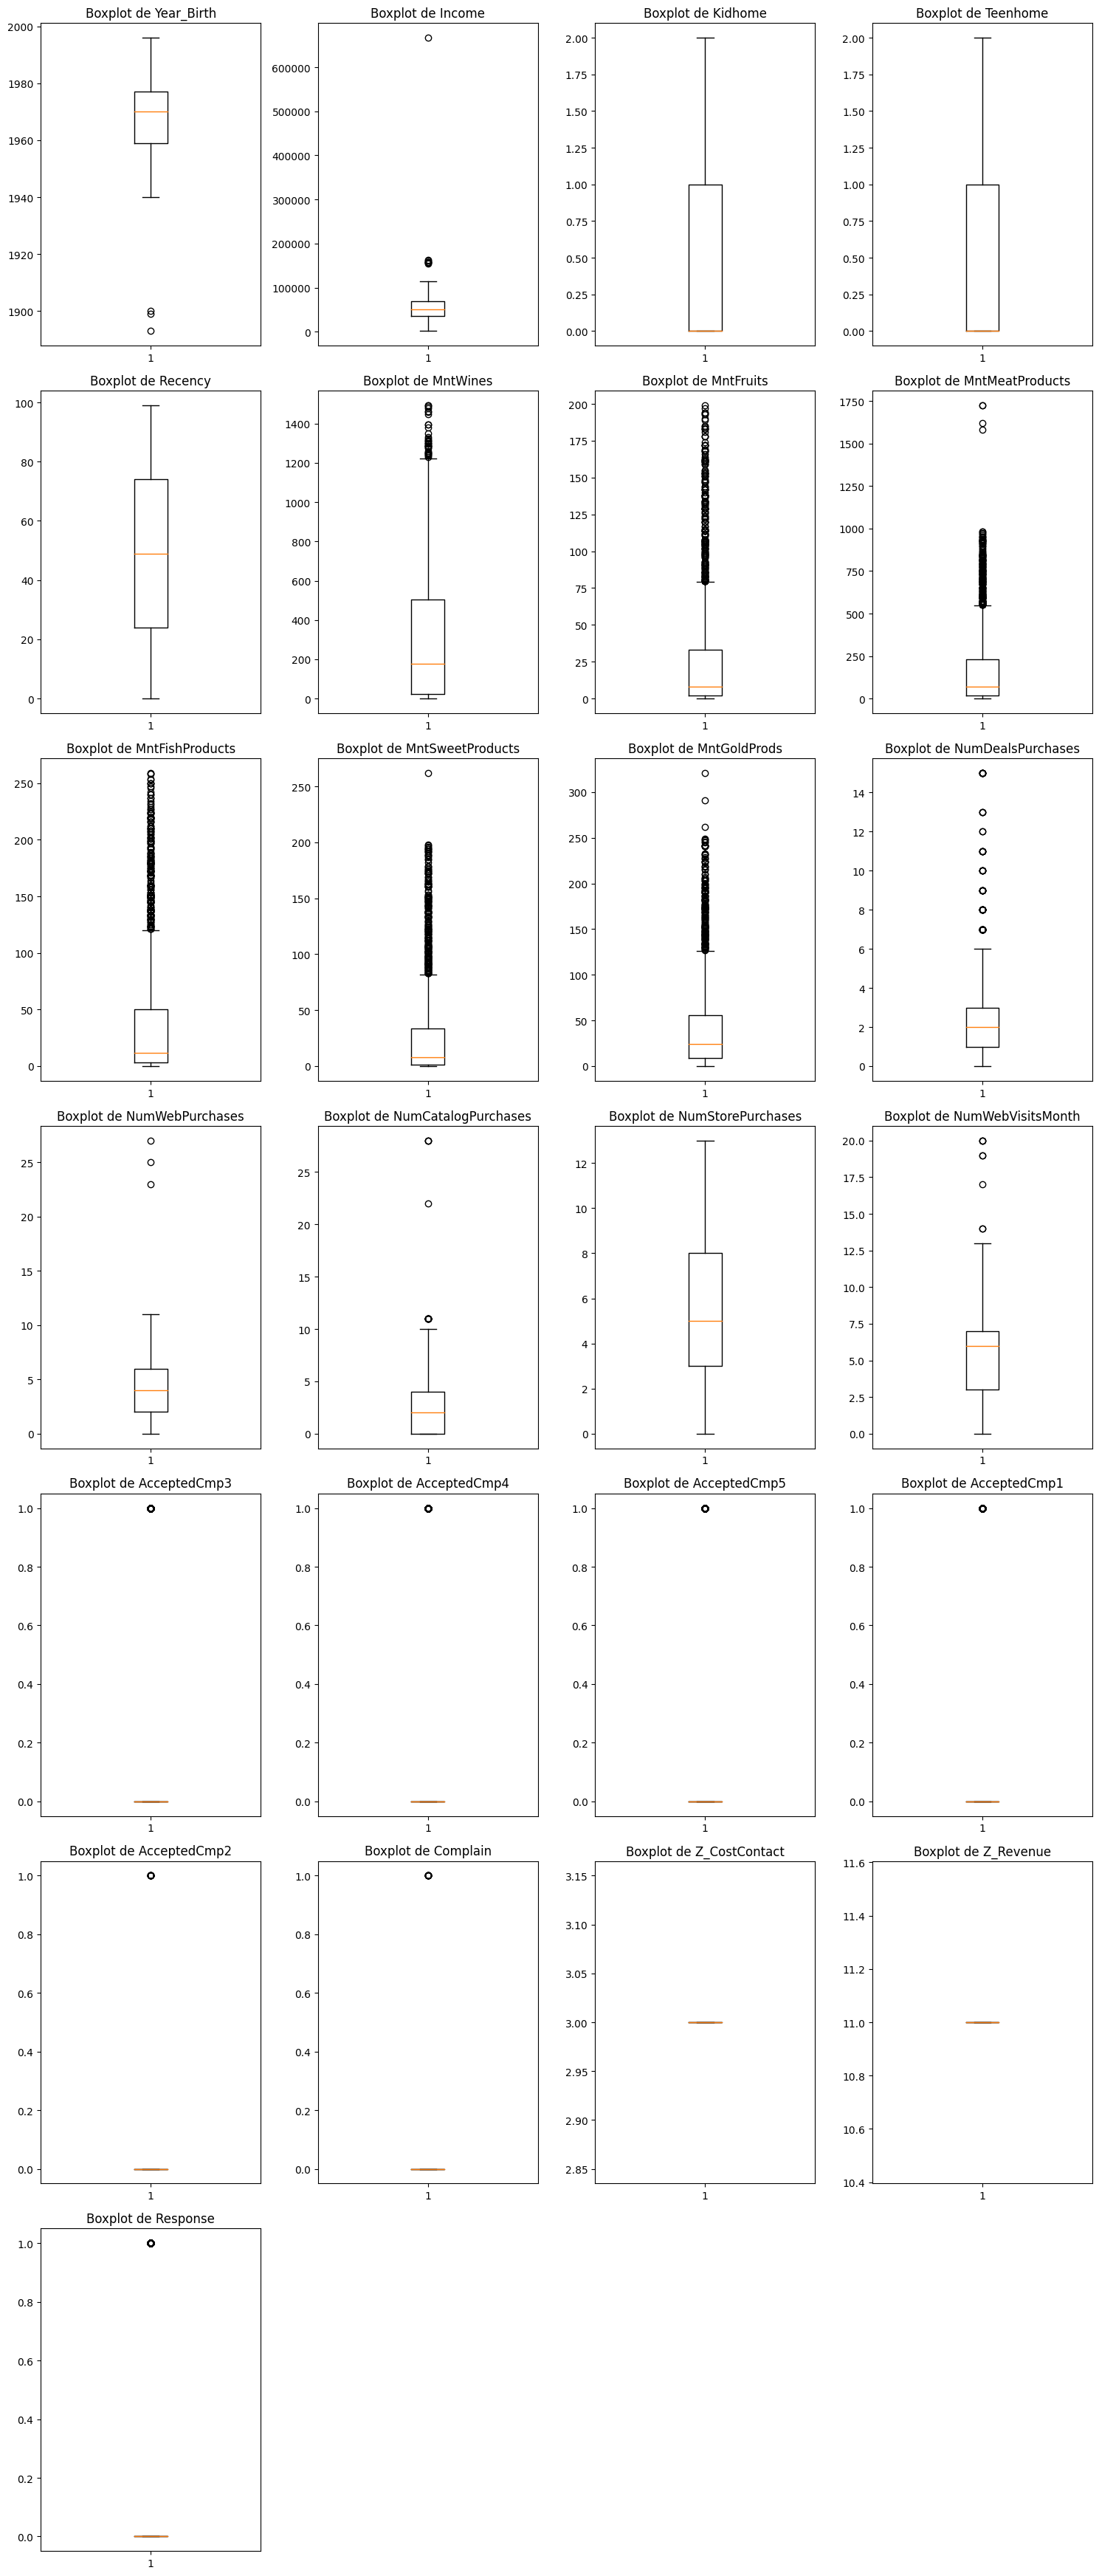

In [9]:
import math

df_num = df.select_dtypes(include='number')

# Calcula el número de filas y columnas para organizar las subgráficas
num_variables = len(df_num.columns)
num_rows = math.ceil(num_variables / 4)  # Ajusta según sea necesario
num_cols = min(4, num_variables)  # Ajusta según sea necesario

# Ajusta el tamaño del gráfico
plt.figure(figsize=(15, 5 * num_rows))

# Itera sobre las columnas y crea un boxplot para cada variable
for i, column in enumerate(df_num.columns):
    plt.subplot(num_rows, num_cols, i+1)
    plt.boxplot(df[column])
    plt.title(f'Boxplot de {column}')

# Ajusta el diseño
plt.tight_layout()

# Muestra el gráfico
plt.show()

In [10]:
#Veo que hay años de nacimientos de 1893 por lo que se espera que esa persona no siga con vida ni comprando o puede ser un error. Se eliminan datos incoherentes, como anteriores a 1934 (personas mayores de 90 años no suele haber)
df = df[df['Year_Birth'] >= 1932]

In [11]:
# Income tiene un valor que es demasiado grande en comparación al resto, lo elimino
df = df[df['Income'] <= 200000]

# 'MntMeatProducts' También? No estoy segura
df = df[df['MntMeatProducts'] <= 1250]

In [12]:
# Elimino las columnas que tiene un solo valor
df = df.drop('Z_CostContact', axis=1)
df = df.drop('Z_Revenue', axis=1)

In [13]:
df.shape

(2026, 26)

# Filtro mi base de datos

Solo dejo los clientes que aceptaron una o más campañas

(Lo único q se me ocurre hacer es separar en los que si aceptaron cada una de las campañas, lugos concatenar y al final eliminar las repetidas)

In [14]:
# # Dejo un df con toda la info
# df_j=df.copy

# df1 = df[df['AcceptedCmp1'] == 1]
# df2 = df[df['AcceptedCmp2'] == 1]
# df3 = df[df['AcceptedCmp3'] == 1]
# df4 = df[df['AcceptedCmp4'] == 1]
# df5 = df[df['AcceptedCmp5'] == 1]

# df= pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# #ver si hay datos duplicados
# df.duplicated().sum()

# # Los elimino y me quedo con la primera ocurrencia.
# df.drop_duplicates(inplace=True)
# df.duplicated().sum()

Quiero ahora hacer una matriz correlación para ver como cambió con el filtro en la base de datos

# Categóricas a Numéricas

In [15]:
# Categóricas a numéricas

# df = pd.get_dummies(df, columns=['Marital_Status'])
# df = pd.get_dummies(df, columns=['Education'])

# df.drop('Rango_edad', axis=1, inplace=True)
# df.drop('Year_Birth', axis=1, inplace=True)

# 3. Clustering

Solo dejo los valores numéricos

In [16]:
df2=df.copy

df = df.select_dtypes(include='number')

In [17]:
df.shape

(2026, 23)

## 3.1. K-Means

Se comienza con los algoritmos de Clustering. Como se vió anteriormente, el número de Cluster recomendado es 2.

###n_Clusters = 2

In [18]:
# Librerías para Clustering
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import seaborn as sns

In [19]:
X=df
num_clusters = 2                                #  Puedo cambiar rápidamente el número de clusters desde aquí
kmeans = KMeans(n_clusters=num_clusters).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
# Ahora vamos a crear un nuevo dataframe que tenga los mismos datos que el original, y que agregue una ultima columna con los clusters de cada pixel
df['clusters_km2']=kmeans.labels_
# df.head(10)
# kmeans.labels_    #con esto puedo ver las etiquetas

In [21]:
# #Quiero ver los centroides
# centroids = kmeans.cluster_centers_
# print(centroids)

####Visualización

In [22]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df['Year_Birth'],
    y= df['Income'],
    z= df['AcceptedCmp3'],
    mode='markers',
     marker=dict(
        color = kmeans.labels_,
        size= 10,
        line=dict(
            #  color = invierno['Ap'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    # title= 'Jugando',
    scene = dict(
            xaxis = dict(title  = 'Year_Birth'),
            yaxis = dict(title  = 'Income'),
            zaxis = dict(title  = 'AcceptedCmp3')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



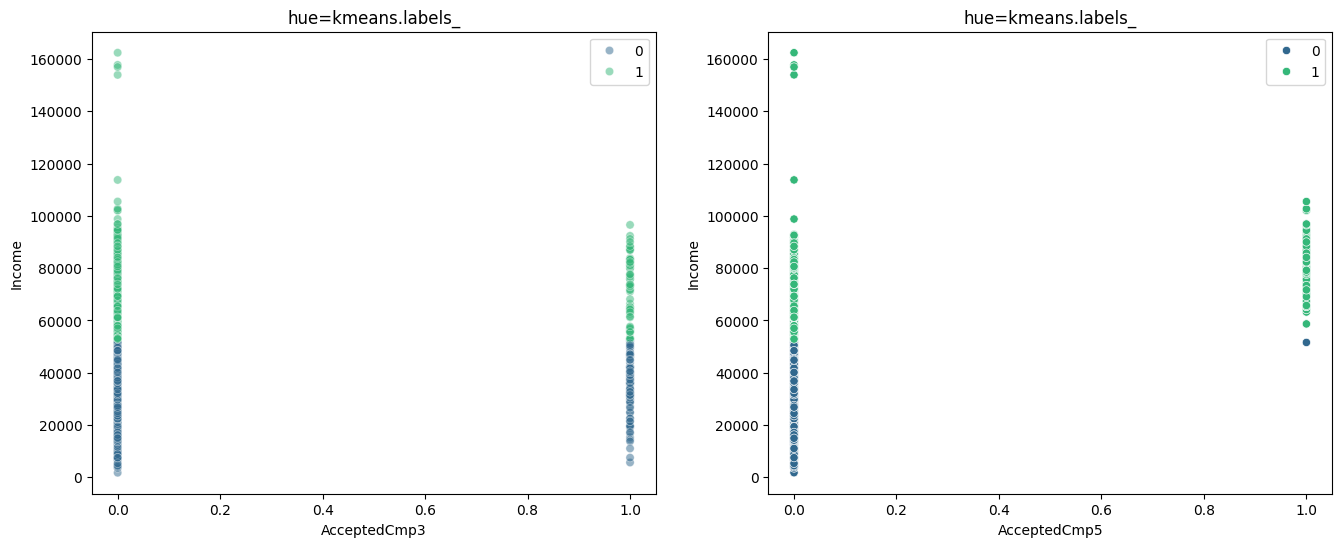

In [23]:
num_clusters = 2                                        #  Esto no hace falta pero puedo cambiar rápidamente el número de clusters desde aquí
kmeans = KMeans(n_clusters=num_clusters).fit(X)

plt.figure(figsize=(16,6))
plt.subplot(121),  sns.scatterplot(data=df, x="AcceptedCmp3", y="Income" , hue=kmeans.labels_, palette="viridis" , alpha=0.5), plt.title('hue=kmeans.labels_')
plt.subplot(122), sns.scatterplot(data=df, x="AcceptedCmp5",  y="Income",palette="viridis", hue=kmeans.labels_), plt.title('hue=kmeans.labels_')
plt.show()

Al visualizar el cluster se puede ver claramente que lo define según su "Income".

-------------------------------------------------

In [24]:
df.shape

(2026, 24)

###n_Clusters = 3

Al ser el Cluster con n=2 tan similar a lo antes estudiado, investigo si el método "cambia de criterio" cuando se le piden 3 clusters.

In [25]:
num_clusters = 3                                #  Puedo cambiar rápidamente el número de clusters desde aquí
kmeans = KMeans(n_clusters=num_clusters).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [26]:
# Ahora vamos a crear un nuevo dataframe que tenga los mismos datos que el original, y que agregue una ultima columna con los clusters de cada pixel
df['clusters_km3']=kmeans.labels_
# df.head(10)
# kmeans.labels_    #con esto puedo ver las etiquetas

#### Visualización

In [27]:
# #Quiero ver los centroides
# centroids = kmeans.cluster_centers_
# print(centroids)

In [28]:
# import plotly as py
# import plotly.graph_objs as go

# trace1 = go.Scatter3d(
#     x= df['Year_Birth'],
#     y= df['Income'],
#     z= df['AcceptedCmp3'],
#     mode='markers',
#      marker=dict(
#         color = df['clusters_km3'],
#         size= 10,
#         line=dict(
#             #  color = invierno['Ap'],
#             width= 12
#         ),
#         opacity=0.8
#      )
# )
# data = [trace1]
# layout = go.Layout(
#     # title= 'Jugando',
#     scene = dict(
#             xaxis = dict(title  = 'Year_Birth'),
#             yaxis = dict(title  = 'Income'),
#             zaxis = dict(title  = 'AcceptedCmp3')
#         )
# )
# fig = go.Figure(data=data, layout=layout)
# py.offline.iplot(fig)

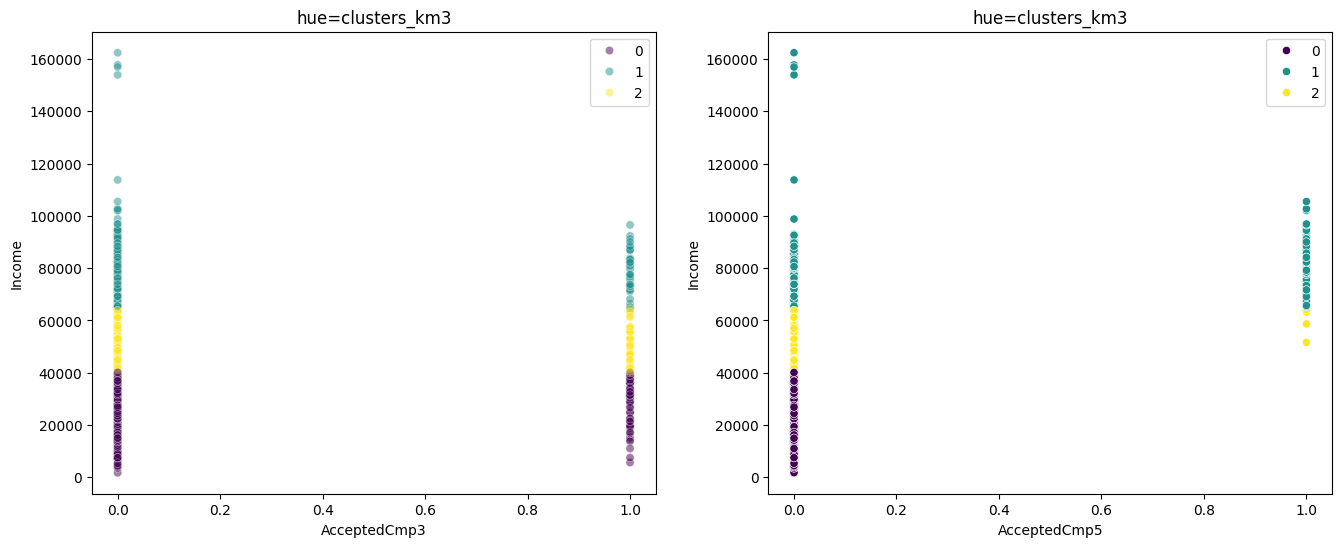

In [29]:
plt.figure(figsize=(16,6))
plt.subplot(121),  sns.scatterplot(data=df, x="AcceptedCmp3", y="Income" , hue=kmeans.labels_, palette="viridis" , alpha=0.5), plt.title('hue=clusters_km3')
plt.subplot(122), sns.scatterplot(data=df, x="AcceptedCmp5",  y="Income",palette="viridis", hue=kmeans.labels_), plt.title('hue=clusters_km3')
plt.show()

De nuevo clusterizó en "Income"

## 3.2 MeanShift

In [30]:
df.shape

(2026, 25)

In [31]:
from sklearn.cluster import estimate_bandwidth
bw=estimate_bandwidth(X,quantile=0.3)
print(bw)

12810.73208304056


In [32]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition
ms = MeanShift(bandwidth=0.5, bin_seeding=False) #bin_seeding=True usa versión discretizada de los puntos en una
# cuadrícula que tiene que ver con el ancho de banda, agiliza el algoritmo
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

# print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)
# print('cantidad de datos por cluster: ', Counter(ms.labels_))

df['clusters_MS']=ms.labels_

df['clusters_MS'].value_counts()

3       2
2       2
0       2
1       2
779     1
       ..
1964    1
1890    1
1032    1
1143    1
1763    1
Name: clusters_MS, Length: 2022, dtype: int64

In [33]:
# df.head(10)

#### Visualización

In [34]:

# trace1 = go.Scatter3d(
#     x= df['Year_Birth'],
#     y= df['Income'],
#     z= df['AcceptedCmp3'],
#     mode='markers',
#      marker=dict(
#         color = df['clusters_MS'],
#         size= 10,
#         line=dict(
#             width= 12
#         ),
#         opacity=0.8
#      )
# )
# data = [trace1]
# layout = go.Layout(
#     # title= 'Jugando',
#     scene = dict(
#             xaxis = dict(title  = 'Year_Birth'),
#             yaxis = dict(title  = 'Income'),
#             zaxis = dict(title  = 'AcceptedCmp3')
#         )
# )
# fig = go.Figure(data=data, layout=layout)
# py.offline.iplot(fig)

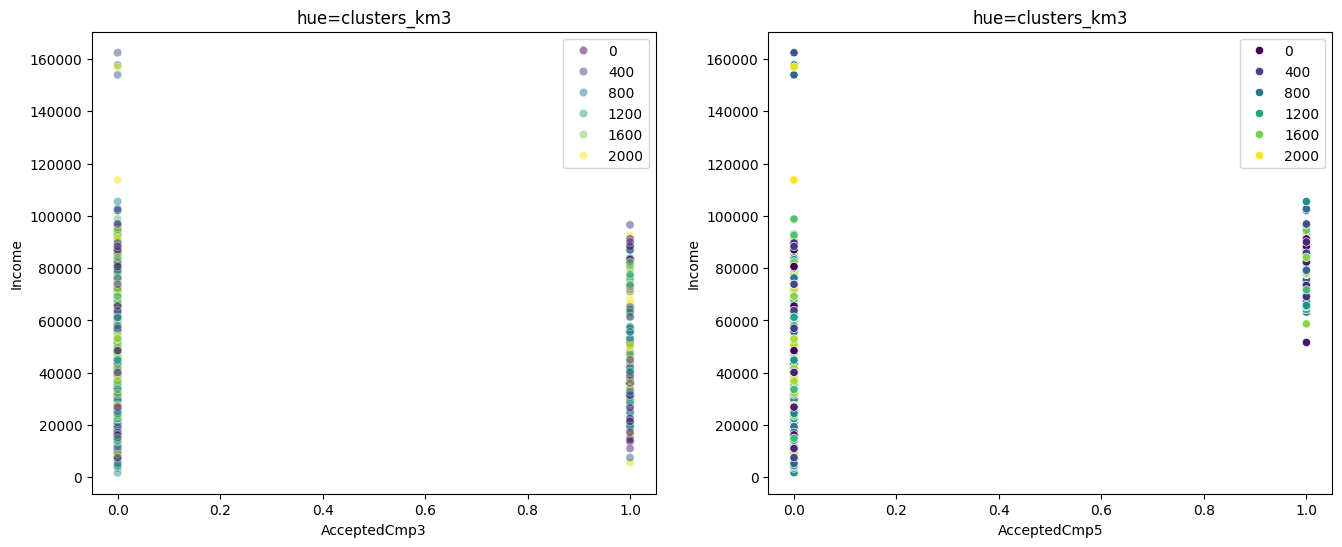

In [35]:
plt.figure(figsize=(16,6))
plt.subplot(121),  sns.scatterplot(data=df, x="AcceptedCmp3", y="Income" , hue=ms.labels_, palette="viridis" , alpha=0.5), plt.title('hue=clusters_km3')
plt.subplot(122), sns.scatterplot(data=df, x="AcceptedCmp5",  y="Income",palette="viridis", hue=ms.labels_), plt.title('hue=clusters_km3')
plt.show()

De nuevo es separado por "Income"

In [36]:
df.shape

(2026, 26)

# **4. Aprendizaje Supervisado**

## 4.1. Vecinos Cercanos

### 4.0. Armado del conjunto de entrenamiento y de prueba

Entreno con el 75% y pruebo con el 25% (aquí decide la función)

In [37]:
df.info()     #para saber los números de las columnas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 5524 to 9405
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2026 non-null   int64  
 1   Income               2026 non-null   float64
 2   Kidhome              2026 non-null   int64  
 3   Teenhome             2026 non-null   int64  
 4   Recency              2026 non-null   int64  
 5   MntWines             2026 non-null   int64  
 6   MntFruits            2026 non-null   int64  
 7   MntMeatProducts      2026 non-null   int64  
 8   MntFishProducts      2026 non-null   int64  
 9   MntSweetProducts     2026 non-null   int64  
 10  MntGoldProds         2026 non-null   int64  
 11  NumDealsPurchases    2026 non-null   int64  
 12  NumWebPurchases      2026 non-null   int64  
 13  NumCatalogPurchases  2026 non-null   int64  
 14  NumStorePurchases    2026 non-null   int64  
 15  NumWebVisitsMonth    2026 non-null 

In [38]:
df.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'clusters_km2', 'clusters_km3',
       'clusters_MS'],
      dtype='object')

In [76]:
# X = df.iloc[:, [36]].values  #  La idea es probar con los clusters o con variables directamente
# X = df[['clusters_MS']]
X = df[['Income', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', "Response"]]
y = df.iloc[:, 18].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print("Todo el conjunto:", len(y)- y.sum(),"/ ", y.sum(),"")
print("Conjunto entrenamiento:", len(y_train)- y_train.sum(),"/ ", y_train.sum(),"")
print("Conjunto prueba:", len(y_test)- y_test.sum(),"/ ", y_test.sum(),"")

Todo el conjunto: 1880 /  146 
Conjunto entrenamiento: 1411 /  108 
Conjunto prueba: 469 /  38 


Aquí tuve que tener cuidado con la distribución de datos

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

In [40]:
# pip install -U imbalanced-learn

### Entreno del modelo

In [41]:
#Vecinos cercanos
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

#Matriz de confusión y Métricas
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
# from sklearn.model_selection import StratifiedKFold, KFold

Accuracy en el conjunto de entrenamiento: 0.9993416721527321
Metricas cross_validation [0.93280632 0.92885375 0.88932806 0.8972332  0.91304348]
Media de cross_validation 0.9122529644268775
 
N° Vecinos Cercanos 2


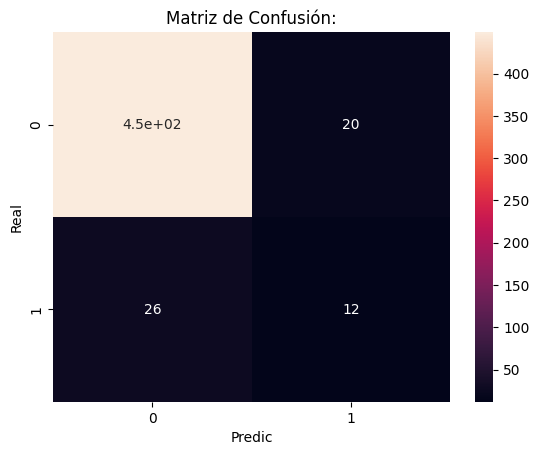

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       469
           1       0.38      0.32      0.34        38

    accuracy                           0.91       507
   macro avg       0.66      0.64      0.65       507
weighted avg       0.90      0.91      0.91       507

 
 
Accuracy en el conjunto de entrenamiento: 0.9993416721527321
Metricas cross_validation [0.93280632 0.93280632 0.90118577 0.8972332  0.90909091]
Media de cross_validation 0.9146245059288537
 
N° Vecinos Cercanos 3


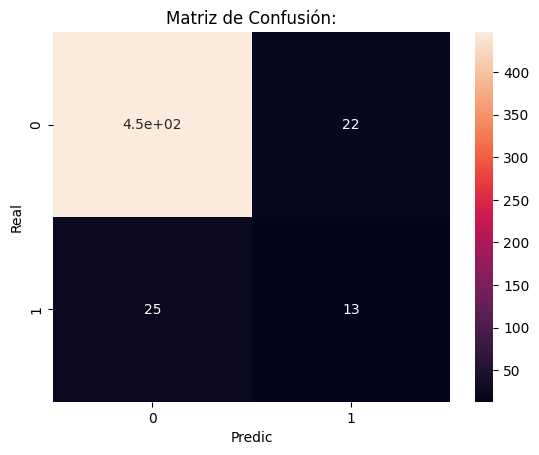

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       469
           1       0.37      0.34      0.36        38

    accuracy                           0.91       507
   macro avg       0.66      0.65      0.65       507
weighted avg       0.90      0.91      0.91       507

 
 
Accuracy en el conjunto de entrenamiento: 0.9993416721527321
Metricas cross_validation [0.93280632 0.93675889 0.90118577 0.90118577 0.91304348]
Media de cross_validation 0.9169960474308301
 
N° Vecinos Cercanos 4


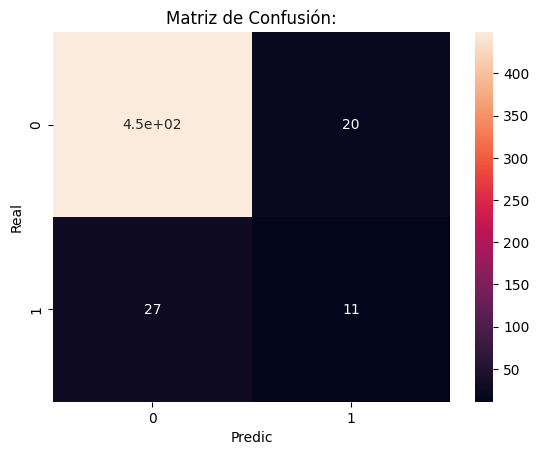

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       469
           1       0.35      0.29      0.32        38

    accuracy                           0.91       507
   macro avg       0.65      0.62      0.63       507
weighted avg       0.90      0.91      0.90       507

 
 
Accuracy en el conjunto de entrenamiento: 0.9993416721527321
Metricas cross_validation [0.93280632 0.94071146 0.90118577 0.8972332  0.91304348]
Media de cross_validation 0.9169960474308301
 
N° Vecinos Cercanos 5


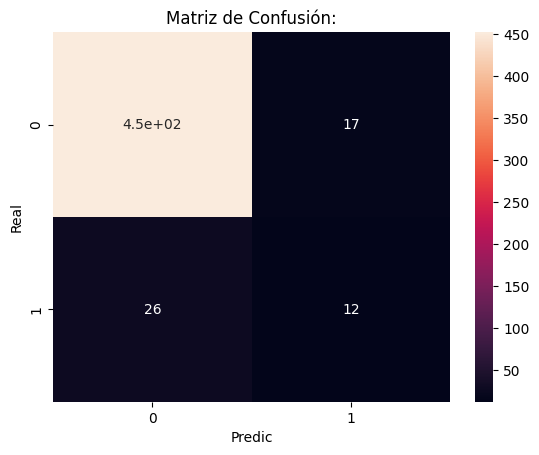

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       469
           1       0.41      0.32      0.36        38

    accuracy                           0.92       507
   macro avg       0.68      0.64      0.66       507
weighted avg       0.91      0.92      0.91       507

 
 
Accuracy en el conjunto de entrenamiento: 0.9993416721527321
Metricas cross_validation [0.94071146 0.94071146 0.90513834 0.8972332  0.91699605]
Media de cross_validation 0.9201581027667984
 
N° Vecinos Cercanos 6


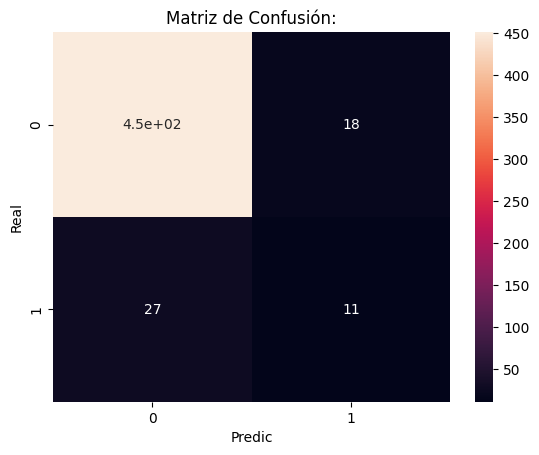

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       469
           1       0.38      0.29      0.33        38

    accuracy                           0.91       507
   macro avg       0.66      0.63      0.64       507
weighted avg       0.90      0.91      0.91       507

 
 
Accuracy en el conjunto de entrenamiento: 0.9993416721527321
Metricas cross_validation [0.93675889 0.94071146 0.90909091 0.8972332  0.91304348]
Media de cross_validation 0.9193675889328062
 
N° Vecinos Cercanos 7


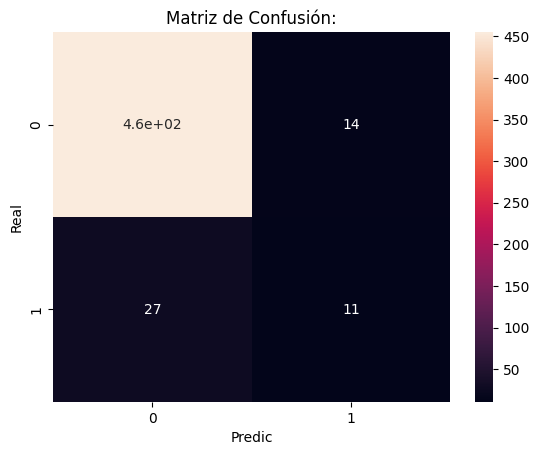

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       469
           1       0.44      0.29      0.35        38

    accuracy                           0.92       507
   macro avg       0.69      0.63      0.65       507
weighted avg       0.91      0.92      0.91       507

 
 
Accuracy en el conjunto de entrenamiento: 0.9993416721527321
Metricas cross_validation [0.93675889 0.94071146 0.92094862 0.8972332  0.91304348]
Media de cross_validation 0.9217391304347826
 
N° Vecinos Cercanos 8


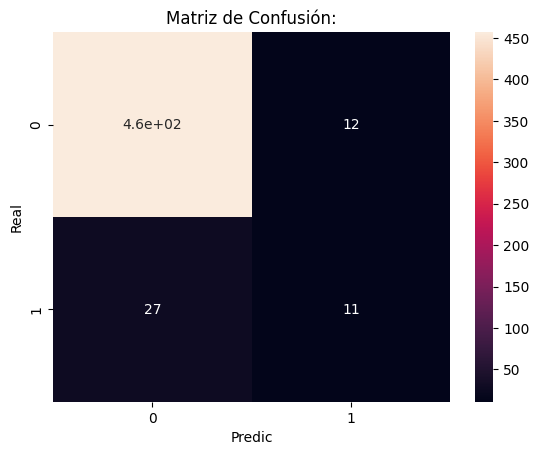

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       469
           1       0.48      0.29      0.36        38

    accuracy                           0.92       507
   macro avg       0.71      0.63      0.66       507
weighted avg       0.91      0.92      0.91       507

 
 
Accuracy en el conjunto de entrenamiento: 0.9993416721527321
Metricas cross_validation [0.94071146 0.94071146 0.91699605 0.8972332  0.91304348]
Media de cross_validation 0.9217391304347826
 
N° Vecinos Cercanos 9


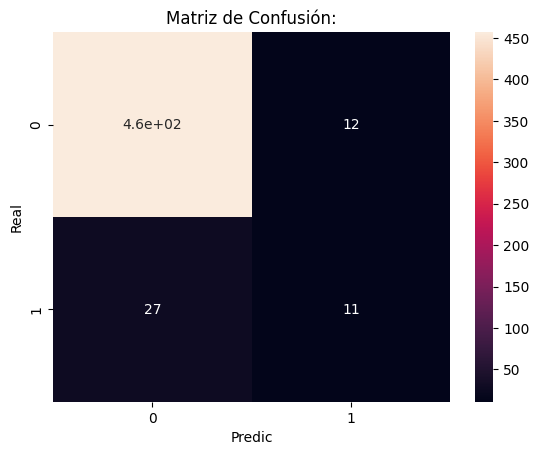

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       469
           1       0.48      0.29      0.36        38

    accuracy                           0.92       507
   macro avg       0.71      0.63      0.66       507
weighted avg       0.91      0.92      0.91       507

 
 
Accuracy en el conjunto de entrenamiento: 0.9993416721527321
Metricas cross_validation [0.94071146 0.94071146 0.92094862 0.8972332  0.91304348]
Media de cross_validation 0.9225296442687748
 
N° Vecinos Cercanos 10


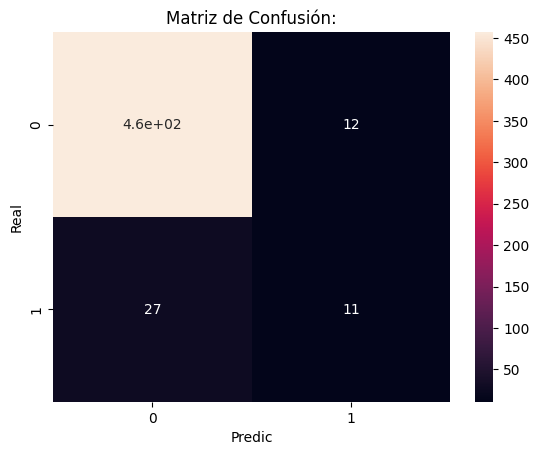

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       469
           1       0.48      0.29      0.36        38

    accuracy                           0.92       507
   macro avg       0.71      0.63      0.66       507
weighted avg       0.91      0.92      0.91       507

 
 
Accuracy en el conjunto de entrenamiento: 0.9993416721527321
Metricas cross_validation [0.94466403 0.94071146 0.91304348 0.8972332  0.91304348]
Media de cross_validation 0.9217391304347826
 
N° Vecinos Cercanos 11


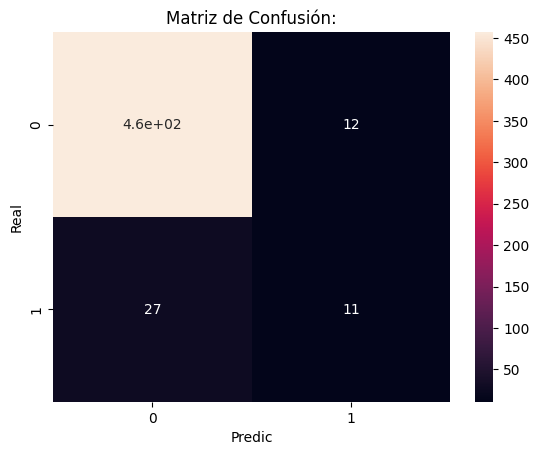

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       469
           1       0.48      0.29      0.36        38

    accuracy                           0.92       507
   macro avg       0.71      0.63      0.66       507
weighted avg       0.91      0.92      0.91       507

 
 
Accuracy en el conjunto de entrenamiento: 0.9993416721527321
Metricas cross_validation [0.94466403 0.94071146 0.91304348 0.90118577 0.91304348]
Media de cross_validation 0.9225296442687746
 
N° Vecinos Cercanos 12


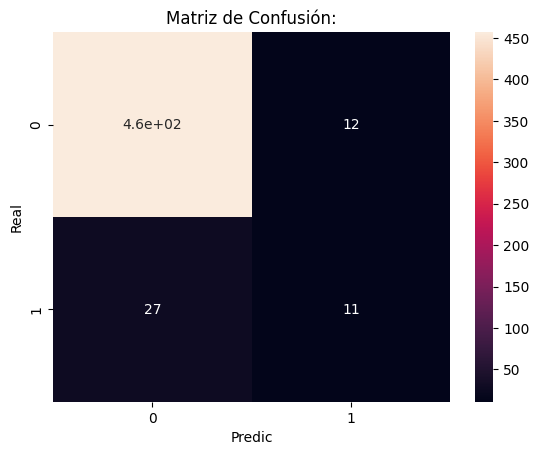

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       469
           1       0.48      0.29      0.36        38

    accuracy                           0.92       507
   macro avg       0.71      0.63      0.66       507
weighted avg       0.91      0.92      0.91       507

 
 
Accuracy en el conjunto de entrenamiento: 0.9993416721527321
Metricas cross_validation [0.94071146 0.94071146 0.91304348 0.90118577 0.91304348]
Media de cross_validation 0.9217391304347826
 
N° Vecinos Cercanos 13


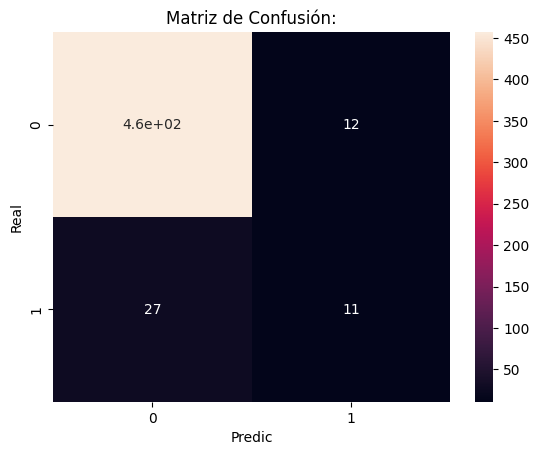

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       469
           1       0.48      0.29      0.36        38

    accuracy                           0.92       507
   macro avg       0.71      0.63      0.66       507
weighted avg       0.91      0.92      0.91       507

 
 
Accuracy en el conjunto de entrenamiento: 0.9993416721527321
Metricas cross_validation [0.94466403 0.94071146 0.91304348 0.90118577 0.91304348]
Media de cross_validation 0.9225296442687746
 
N° Vecinos Cercanos 14


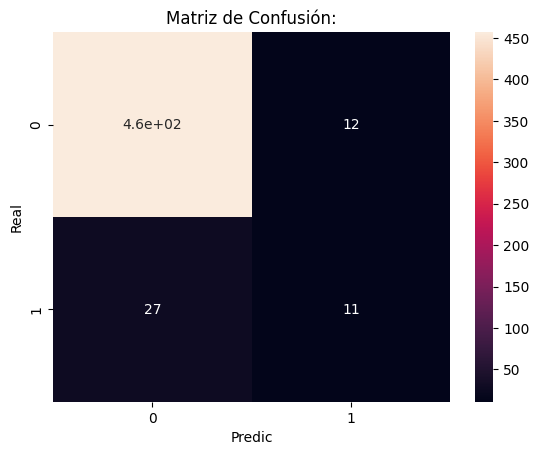

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       469
           1       0.48      0.29      0.36        38

    accuracy                           0.92       507
   macro avg       0.71      0.63      0.66       507
weighted avg       0.91      0.92      0.91       507

 
 


In [77]:
n_neighbors_range = list(range(2, 15))# List to store the average RMSE for each value of max_depth:
accuracy = []

for n_neighbor in n_neighbors_range:
    clf = KNeighborsClassifier(n_neighbors = n_neighbor ,
                              weights ='distance')
                              # weights = 'uniform'
    clf.fit(X_train, y_train)
# Veo el accuracy sobre el conjunto train
    y_train_pred = clf.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    print("Accuracy en el conjunto de entrenamiento:", accuracy_train)
# Validación cruzada para serie temporal
    # kf = StratifiedKFold(n_splits=5) #este busca iterar teniendo en cuenta el desequilibrio en los datos
    kf = TimeSeriesSplit(n_splits=5)
    scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring="accuracy")
    print("Metricas cross_validation", scores)
    print("Media de cross_validation", scores.mean())

    print(" ")
# Prueba
    y_pred = clf.predict(X_test)
    matriz = confusion_matrix(y_test, y_pred)
#Matriz confusión y métricas
    print('N° Vecinos Cercanos',n_neighbor)
    # plt.figure(figsize=(12,12))
    sns.heatmap(matriz, annot=True)
    plt.title('Matriz de Confusión:'), plt.ylabel("Real"), plt.xlabel("Predic")
    plt.show()

    print(metrics.classification_report(y_test, y_pred))

    print(" ")
    print(" ")

**Métricas**

(Luego de entrenar nuestro modelo y habiendo decidido como métrica el Accuracy (el % de aciertos) obtenemos un 75% sobre el set de entrenamiento (y asumimos que ese porcentaje nos sirve para nuestro objetivo).)

Cuando hacemos el predict() sobre el conjunto de test y obtenemos las predicciones, las podemos comprobar y contrastar con los valores reales almacenados en y_test y hallar así la métrica que usamos. Los resultados que nos puede dar serán:

1. Si el accuracy en Test es "cercano" al de Entrenamiento (dijimos 75%) por ejemplo en este caso si estuviera entre 65 ú 85% quiere decir que nuestro modelo entrenado está generalizando bien y lo podemos dar por bueno (siempre y cuando estemos conformes con las métricas obtenidas).

2. Si el Accuracy en Test es muy distinto al de Entrenamiento tanto por encima como por debajo, nos da un 99% ó un 25% (lejano al 75%) entonces es un indicador de que nuestro modelo no ha entrenado bien y no nos sirve. De hecho este podría ser un indicador de Overfitting.
Para evaluar mejor el segundo caso, es donde aparece el “conjunto de Validación”.

Cuatro casos posibles para cada clase:

**Alta precision y alto recall:** el modelo maneja perfectamente esa clase

**Alta precision y bajo recall:** el modelo no detecta la clase muy bien, pero cuando lo hace es altamente confiable.

**Baja precisión y alto recall:** se detecta bien la clase pero también incluye muestras de otras clases.

**Baja precisión y bajo recall:** El modelo no logra clasificar la clase correctamente.

Cuando tenemos un dataset desbalanceado, suele ocurrir que obtenemos un alto valor de precisión en la clase Mayoritaria y un bajo recall en la clase Minoritaria

https://www.aprendemachinelearning.com/sets-de-entrenamiento-test-validacion-cruzada/

## 4.2 Árbol de decisión

### Conjunto de entrenamiento y prueba

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 5524 to 9405
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2026 non-null   int64  
 1   Income               2026 non-null   float64
 2   Kidhome              2026 non-null   int64  
 3   Teenhome             2026 non-null   int64  
 4   Recency              2026 non-null   int64  
 5   MntWines             2026 non-null   int64  
 6   MntFruits            2026 non-null   int64  
 7   MntMeatProducts      2026 non-null   int64  
 8   MntFishProducts      2026 non-null   int64  
 9   MntSweetProducts     2026 non-null   int64  
 10  MntGoldProds         2026 non-null   int64  
 11  NumDealsPurchases    2026 non-null   int64  
 12  NumWebPurchases      2026 non-null   int64  
 13  NumCatalogPurchases  2026 non-null   int64  
 14  NumStorePurchases    2026 non-null   int64  
 15  NumWebVisitsMonth    2026 non-null 

In [44]:
# X = df.iloc[:, [36]].values
# X = df[['clusters_MS']]
X = df[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response','clusters_km2', 'clusters_km3',
       'clusters_MS']]
y = df.iloc[:, 18].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print("Todo el conjunto:", len(y)- y.sum(),"/ ", y.sum(),"")
print("Conjunto entrenamiento:", len(y_train)- y_train.sum(),"/ ", y_train.sum(),"")
print("Conjunto prueba:", len(y_test)- y_test.sum(),"/ ", y_test.sum(),"")

Todo el conjunto: 1880 /  146 
Conjunto entrenamiento: 1411 /  108 
Conjunto prueba: 469 /  38 


### Entreno del modelo

In [45]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

In [46]:
 # entrenamiento del árbol
CLF = tree.DecisionTreeClassifier(max_depth=2, random_state=42)
CLF.fit(X_train, y_train)

# podemos usar el método predict para obtener predicciones
y_pred = CLF.predict(X_test)
# print(CLF6.predict(X_test) )

Grafico el árbol

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz
from IPython.display import Image
import pydotplus

Precisión del modelo: 0.9467455621301775


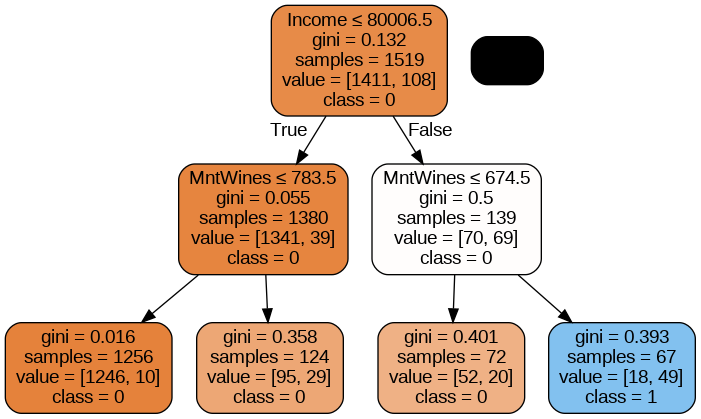

In [48]:
# Calcular la precisión
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", precision)

# Visualizar el árbol de decisión
dot_data = export_graphviz(CLF, out_file=None, feature_names=X.columns, class_names=['0', '1'],
                           filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [49]:
# Otra manera de graficar no tan bonita
# plt.figure(figsize = (50,50))
# plot_tree(CLF6,
#           feature_names= X_test.columns,
#           impurity = False,
#           node_ids = True,
#           proportion = True,
#           rounded = True,
#           precision = 2);


In [50]:
# Bajo el gráfico del árbol a un archivo como una imagen png
dot_data = export_graphviz(CLF,
                         class_names = ['0', '1'] ,
                filled = True, rounded = True,
                special_characters = True)
graph = graph_from_dot_data(dot_data)
graph.write_png('arbol_profundidad_6.png')

True

In [51]:
#Importancia de cada variable
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(CLF.feature_importances_,4)})
importances = importances.sort_values('importance',ascending=False)
print(importances)

                feature  importance
1                Income      0.6821
5              MntWines      0.3179
0            Year_Birth      0.0000
14    NumStorePurchases      0.0000
23         clusters_km3      0.0000
22         clusters_km2      0.0000
21             Response      0.0000
20             Complain      0.0000
19         AcceptedCmp2      0.0000
18         AcceptedCmp1      0.0000
17         AcceptedCmp4      0.0000
16         AcceptedCmp3      0.0000
15    NumWebVisitsMonth      0.0000
12      NumWebPurchases      0.0000
13  NumCatalogPurchases      0.0000
11    NumDealsPurchases      0.0000
10         MntGoldProds      0.0000
9      MntSweetProducts      0.0000
8       MntFishProducts      0.0000
7       MntMeatProducts      0.0000
6             MntFruits      0.0000
4               Recency      0.0000
3              Teenhome      0.0000
2               Kidhome      0.0000
24          clusters_MS      0.0000


Matriz de Confusión:


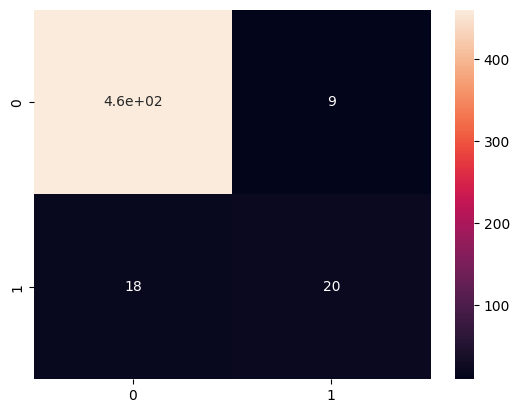

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       469
           1       0.69      0.53      0.60        38

    accuracy                           0.95       507
   macro avg       0.83      0.75      0.78       507
weighted avg       0.94      0.95      0.94       507



In [52]:
# Matriz de confusión y métricas
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.metrics import classification_report

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
sn.heatmap(matriz, annot=True)
plt.show()

# Obtener el informe de clasificación
reporte_clasificacion = classification_report(y_test, y_pred)
print(reporte_clasificacion)

In [53]:
# n_profundidad = list(range(2, 8))# List to store the average RMSE for each value of max_depth:
# accuracy = []

# for n_prof in n_profundidad:
#     CLF = tree.DecisionTreeClassifier(max_depth=n_prof, random_state=42)
#     clf.fit(X_train, y_train)
# # Veo el accuracy sobre el conjunto train
#     y_train_pred = clf.predict(X_train)
#     accuracy_train = accuracy_score(y_train, y_train_pred)
#     print("Accuracy en el conjunto de entrenamiento:", accuracy_train)
# # Validación cruzada para serie temporal
#     # kf = StratifiedKFold(n_splits=5) #este busca iterar teniendo en cuenta el desequilibrio en los datos
#     kf = TimeSeriesSplit(n_splits=5)
#     scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring="accuracy")
#     print("Metricas cross_validation", scores)
#     print("Media de cross_validation", scores.mean())

#     print(" ")
# # Prueba
#     y_pred = clf.predict(X_test)
#     matriz = confusion_matrix(y_test, y_pred)
# #Matriz confusión y métricas
#     print('N° Vecinos Cercanos',n_neighbor)
#     # plt.figure(figsize=(12,12))
#     sns.heatmap(matriz, annot=True)
#     plt.title('Matriz de Confusión:'), plt.ylabel("Real"), plt.xlabel("Predic")
#     plt.show()

#     print(metrics.classification_report(y_test, y_pred))

#     print(" ")
#     print(" ")

En teoría esto es para ver cual es el número óptimo de profundidad del árbol pero evitar overfitting y underfitting

In [54]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds_val)
    return(mae)

In [55]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_pred)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  0
Max leaf nodes: 50  		 Mean Absolute Error:  0
Max leaf nodes: 500  		 Mean Absolute Error:  0
Max leaf nodes: 5000  		 Mean Absolute Error:  0


## 4.3 Naive Bayes

### Conjunto de entrenamiento y prueba

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 5524 to 9405
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2026 non-null   int64  
 1   Income               2026 non-null   float64
 2   Kidhome              2026 non-null   int64  
 3   Teenhome             2026 non-null   int64  
 4   Recency              2026 non-null   int64  
 5   MntWines             2026 non-null   int64  
 6   MntFruits            2026 non-null   int64  
 7   MntMeatProducts      2026 non-null   int64  
 8   MntFishProducts      2026 non-null   int64  
 9   MntSweetProducts     2026 non-null   int64  
 10  MntGoldProds         2026 non-null   int64  
 11  NumDealsPurchases    2026 non-null   int64  
 12  NumWebPurchases      2026 non-null   int64  
 13  NumCatalogPurchases  2026 non-null   int64  
 14  NumStorePurchases    2026 non-null   int64  
 15  NumWebVisitsMonth    2026 non-null 

In [82]:
df.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'clusters_km2', 'clusters_km3',
       'clusters_MS'],
      dtype='object')

In [95]:
# X = df.iloc[:, [36]].values
# X = df[['clusters_MS']]
X = df[['Income',  'MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2']]
y = df.iloc[:, 18].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print("Todo el conjunto:", len(y)- y.sum(),"/ ", y.sum(),"")
print("Conjunto entrenamiento:", len(y_train)- y_train.sum(),"/ ", y_train.sum(),"")
print("Conjunto prueba:", len(y_test)- y_test.sum(),"/ ", y_test.sum(),"")

Todo el conjunto: 1880 /  146 
Conjunto entrenamiento: 1411 /  108 
Conjunto prueba: 469 /  38 


### Entreno del modelo

Accuracy en el conjunto de entrenamiento: 1.0
Metricas cross_validation [1. 1. 1. 1. 1.]
Media de cross_validation 1.0
 
algoritmo GaussianNB()


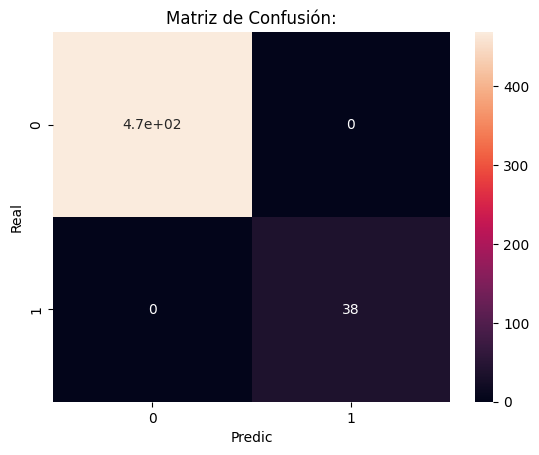

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       469
           1       1.00      1.00      1.00        38

    accuracy                           1.00       507
   macro avg       1.00      1.00      1.00       507
weighted avg       1.00      1.00      1.00       507

 
 
Accuracy en el conjunto de entrenamiento: 1.0
Metricas cross_validation [1. 1. 1. 1. 1.]
Media de cross_validation 1.0
 
algoritmo MultinomialNB()


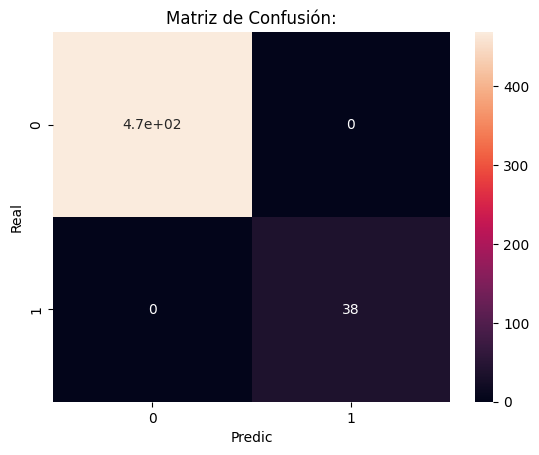

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       469
           1       1.00      1.00      1.00        38

    accuracy                           1.00       507
   macro avg       1.00      1.00      1.00       507
weighted avg       1.00      1.00      1.00       507

 
 
Accuracy en el conjunto de entrenamiento: 0.9993416721527321
Metricas cross_validation [1. 1. 1. 1. 1.]
Media de cross_validation 1.0
 
algoritmo ComplementNB()


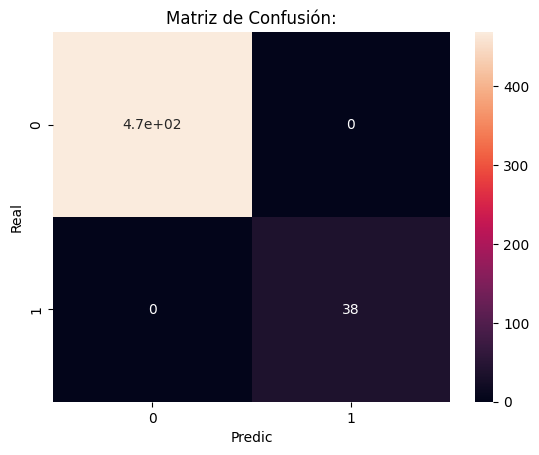

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       469
           1       1.00      1.00      1.00        38

    accuracy                           1.00       507
   macro avg       1.00      1.00      1.00       507
weighted avg       1.00      1.00      1.00       507

 
 
Accuracy en el conjunto de entrenamiento: 0.9993416721527321
Metricas cross_validation [1. 1. 1. 1. 1.]
Media de cross_validation 1.0
 
algoritmo BernoulliNB()


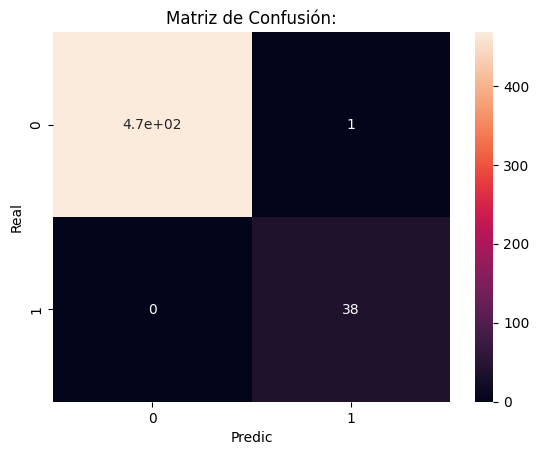

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       469
           1       0.97      1.00      0.99        38

    accuracy                           1.00       507
   macro avg       0.99      1.00      0.99       507
weighted avg       1.00      1.00      1.00       507

 
 


In [96]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB

algoritmos= [GaussianNB(), MultinomialNB(), ComplementNB(), BernoulliNB()]
accuracy = []

for algoritm in algoritmos:
    nb = algoritm
    nb.fit(X_train, y_train)
# Veo el accuracy sobre el conjunto train
    y_train_pred = nb.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    print("Accuracy en el conjunto de entrenamiento:", accuracy_train)
# Validación cruzada para serie temporal
    # kf = StratifiedKFold(n_splits=5) #este busca iterar teniendo en cuenta el desequilibrio en los datos
    kf = TimeSeriesSplit(n_splits=5)
    scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring="accuracy")
    print("Metricas cross_validation", scores)
    print("Media de cross_validation", scores.mean())

    print(" ")
# Prueba
    y_pred = nb.predict(X_test)
    matriz = confusion_matrix(y_test, y_pred)
#Matriz confusión y métricas
    print('algoritmo',algoritm)
    # plt.figure(figsize=(12,12))
    sns.heatmap(matriz, annot=True)
    plt.title('Matriz de Confusión:'), plt.ylabel("Real"), plt.xlabel("Predic")
    plt.show()

    print(metrics.classification_report(y_test, y_pred))

    print(" ")
    print(" ")

## 4.4 Máquina de soporte vectorial

### Conjunto de entrenamiento y prueba

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 5524 to 9405
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2026 non-null   int64  
 1   Income               2026 non-null   float64
 2   Kidhome              2026 non-null   int64  
 3   Teenhome             2026 non-null   int64  
 4   Recency              2026 non-null   int64  
 5   MntWines             2026 non-null   int64  
 6   MntFruits            2026 non-null   int64  
 7   MntMeatProducts      2026 non-null   int64  
 8   MntFishProducts      2026 non-null   int64  
 9   MntSweetProducts     2026 non-null   int64  
 10  MntGoldProds         2026 non-null   int64  
 11  NumDealsPurchases    2026 non-null   int64  
 12  NumWebPurchases      2026 non-null   int64  
 13  NumCatalogPurchases  2026 non-null   int64  
 14  NumStorePurchases    2026 non-null   int64  
 15  NumWebVisitsMonth    2026 non-null 

In [60]:
# X = df.iloc[:, [36]].values
# X = df[['clusters_MS']]
X = df[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response','clusters_km2', 'clusters_km3',
       'clusters_MS']]
y = df.iloc[:, 18].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print("Todo el conjunto:", len(y)- y.sum(),"/ ", y.sum(),"")
print("Conjunto entrenamiento:", len(y_train)- y_train.sum(),"/ ", y_train.sum(),"")
print("Conjunto prueba:", len(y_test)- y_test.sum(),"/ ", y_test.sum(),"")

Todo el conjunto: 1880 /  146 
Conjunto entrenamiento: 1411 /  108 
Conjunto prueba: 469 /  38 


### Entreno del modelo

Accuracy en el conjunto de entrenamiento: 0.945358788676761
Metricas cross_validation [0.94071146 0.9486166  0.92094862 0.93280632 0.95652174]
Media de cross_validation 0.9399209486166008
 
algoritmo linear


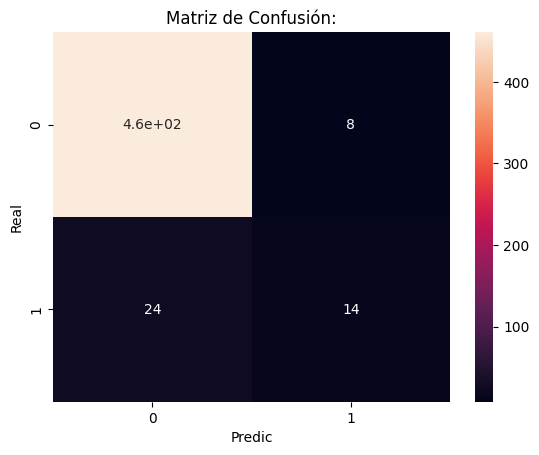

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       469
           1       0.64      0.37      0.47        38

    accuracy                           0.94       507
   macro avg       0.79      0.68      0.72       507
weighted avg       0.93      0.94      0.93       507

 
 
Accuracy en el conjunto de entrenamiento: 0.9289005924950625
Metricas cross_validation [0.92094862 0.92490119 0.90909091 0.93675889 0.93280632]
Media de cross_validation 0.924901185770751
 
algoritmo poly


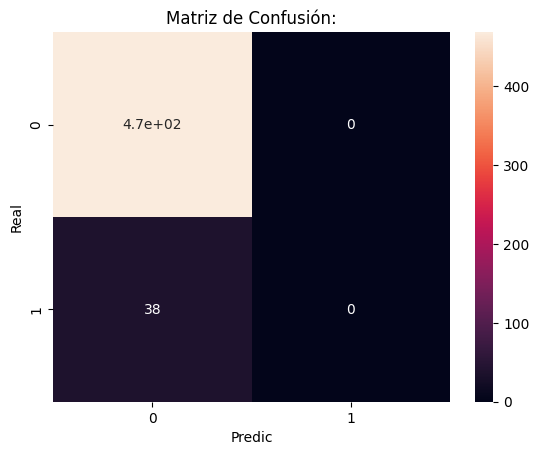

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.93      1.00      0.96       469
           1       0.00      0.00      0.00        38

    accuracy                           0.93       507
   macro avg       0.46      0.50      0.48       507
weighted avg       0.86      0.93      0.89       507

 
 
Accuracy en el conjunto de entrenamiento: 0.9289005924950625
Metricas cross_validation [0.92094862 0.95256917 0.91304348 0.94071146 0.93280632]
Media de cross_validation 0.9320158102766799
 
algoritmo rbf


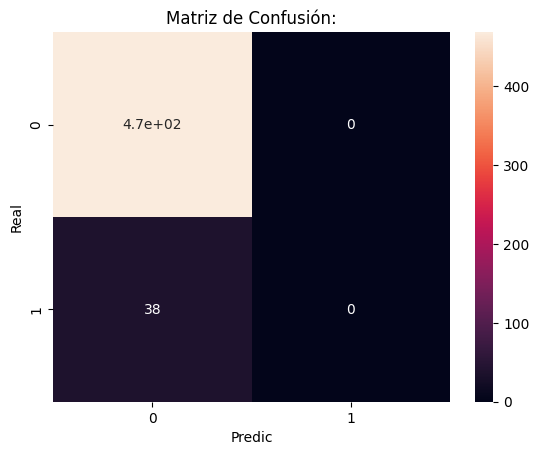

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.93      1.00      0.96       469
           1       0.00      0.00      0.00        38

    accuracy                           0.93       507
   macro avg       0.46      0.50      0.48       507
weighted avg       0.86      0.93      0.89       507

 
 
Accuracy en el conjunto de entrenamiento: 0.9289005924950625
Metricas cross_validation [0.92094862 0.92490119 0.92094862 0.93675889 0.93280632]
Media de cross_validation 0.9272727272727274
 
algoritmo sigmoid


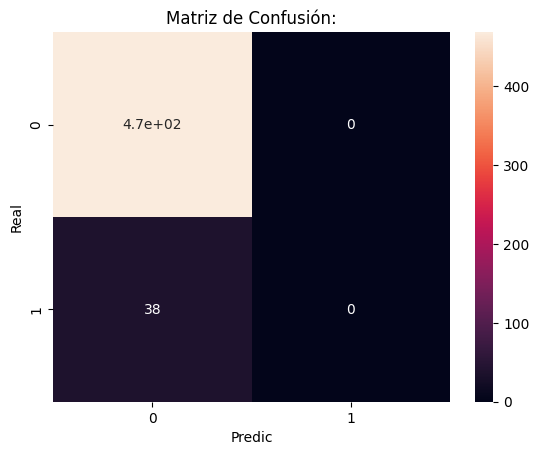

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       469
           1       0.00      0.00      0.00        38

    accuracy                           0.93       507
   macro avg       0.46      0.50      0.48       507
weighted avg       0.86      0.93      0.89       507

 
 


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [61]:
from sklearn import svm

algoritmos= ["linear", "poly", "rbf", "sigmoid"]
accuracy = []

for algoritm in algoritmos:
    clf = svm.SVC(kernel=algoritm)
    clf.fit(X_train, y_train)
# Veo el accuracy sobre el conjunto train
    y_train_pred = clf.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    print("Accuracy en el conjunto de entrenamiento:", accuracy_train)
# Validación cruzada para serie temporal
    # kf = StratifiedKFold(n_splits=5) #este busca iterar teniendo en cuenta el desequilibrio en los datos
    kf = TimeSeriesSplit(n_splits=5)
    scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring="accuracy")
    print("Metricas cross_validation", scores)
    print("Media de cross_validation", scores.mean())

    print(" ")
# Prueba
    y_pred = clf.predict(X_test)
    matriz = confusion_matrix(y_test, y_pred)
#Matriz confusión y métricas
    print('algoritmo',algoritm)
    # plt.figure(figsize=(12,12))
    sns.heatmap(matriz, annot=True)
    plt.title('Matriz de Confusión:'), plt.ylabel("Real"), plt.xlabel("Predic")
    plt.show()

    print(metrics.classification_report(y_test, y_pred))

    print(" ")
    print(" ")

## 4.5 Análisis discriminante linal y cuadrático

### Conjunto de entrenamiento y prueba

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 5524 to 9405
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2026 non-null   int64  
 1   Income               2026 non-null   float64
 2   Kidhome              2026 non-null   int64  
 3   Teenhome             2026 non-null   int64  
 4   Recency              2026 non-null   int64  
 5   MntWines             2026 non-null   int64  
 6   MntFruits            2026 non-null   int64  
 7   MntMeatProducts      2026 non-null   int64  
 8   MntFishProducts      2026 non-null   int64  
 9   MntSweetProducts     2026 non-null   int64  
 10  MntGoldProds         2026 non-null   int64  
 11  NumDealsPurchases    2026 non-null   int64  
 12  NumWebPurchases      2026 non-null   int64  
 13  NumCatalogPurchases  2026 non-null   int64  
 14  NumStorePurchases    2026 non-null   int64  
 15  NumWebVisitsMonth    2026 non-null 

In [63]:
# X = df.iloc[:, [36]].values
# X = df[['clusters_MS']]
X = df[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response','clusters_km2', 'clusters_km3',
       'clusters_MS']]
y = df.iloc[:, 18].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print("Todo el conjunto:", len(y)- y.sum(),"/ ", y.sum(),"")
print("Conjunto entrenamiento:", len(y_train)- y_train.sum(),"/ ", y_train.sum(),"")
print("Conjunto prueba:", len(y_test)- y_test.sum(),"/ ", y_test.sum(),"")

Todo el conjunto: 1880 /  146 
Conjunto entrenamiento: 1411 /  108 
Conjunto prueba: 469 /  38 


### Entreno modelos

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
classifier = LinearDiscriminantAnalysis()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# print(y_pred)

algoritmo sigmoid


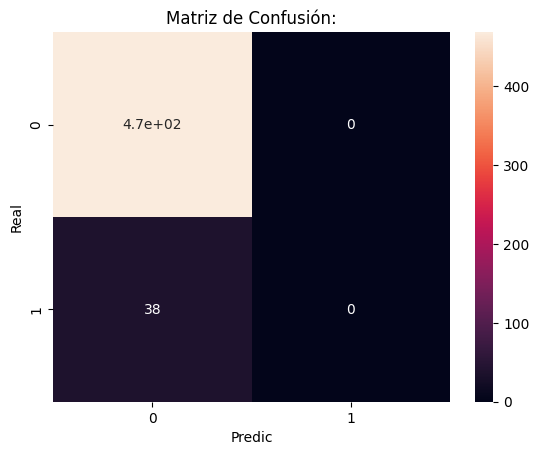

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       469
           1       0.51      0.63      0.56        38

    accuracy                           0.93       507
   macro avg       0.74      0.79      0.76       507
weighted avg       0.94      0.93      0.93       507

 


In [65]:
print('algoritmo',algoritm)
    # plt.figure(figsize=(12,12))
sns.heatmap(matriz, annot=True)
plt.title('Matriz de Confusión:'), plt.ylabel("Real"), plt.xlabel("Predic")
plt.show()

print(metrics.classification_report(y_test, y_pred))

print(" ")

In [66]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifier = QuadraticDiscriminantAnalysis()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# print(y_pred)

algoritmo sigmoid


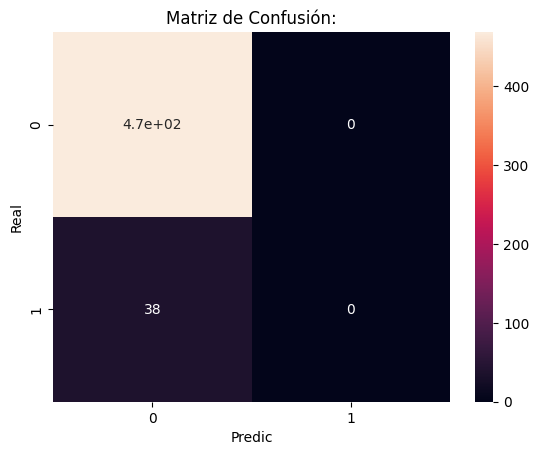

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       469
           1       0.36      0.87      0.51        38

    accuracy                           0.88       507
   macro avg       0.68      0.87      0.72       507
weighted avg       0.94      0.88      0.90       507

 


In [67]:
print('algoritmo',algoritm)
    # plt.figure(figsize=(12,12))
sns.heatmap(matriz, annot=True)
plt.title('Matriz de Confusión:'), plt.ylabel("Real"), plt.xlabel("Predic")
plt.show()

print(metrics.classification_report(y_test, y_pred))

print(" ")

## 4.6 Redes Neuronales

### Conjunto de entrenamiento y prueba

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 5524 to 9405
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2026 non-null   int64  
 1   Income               2026 non-null   float64
 2   Kidhome              2026 non-null   int64  
 3   Teenhome             2026 non-null   int64  
 4   Recency              2026 non-null   int64  
 5   MntWines             2026 non-null   int64  
 6   MntFruits            2026 non-null   int64  
 7   MntMeatProducts      2026 non-null   int64  
 8   MntFishProducts      2026 non-null   int64  
 9   MntSweetProducts     2026 non-null   int64  
 10  MntGoldProds         2026 non-null   int64  
 11  NumDealsPurchases    2026 non-null   int64  
 12  NumWebPurchases      2026 non-null   int64  
 13  NumCatalogPurchases  2026 non-null   int64  
 14  NumStorePurchases    2026 non-null   int64  
 15  NumWebVisitsMonth    2026 non-null 

In [69]:
# X = df.iloc[:, [36]].values
# X = df[['MS']]
X = df[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response','clusters_km2', 'clusters_km3', 'clusters_MS']]
y = df.iloc[:, 18].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print("Todo el conjunto:", len(y)- y.sum(),"/ ", y.sum(),"")
print("Conjunto entrenamiento:", len(y_train)- y_train.sum(),"/ ", y_train.sum(),"")
print("Conjunto prueba:", len(y_test)- y_test.sum(),"/ ", y_test.sum(),"")

Todo el conjunto: 1880 /  146 
Conjunto entrenamiento: 1411 /  108 
Conjunto prueba: 469 /  38 


### Entreno del modelo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



identity lbfgs
Matriz de Confusión


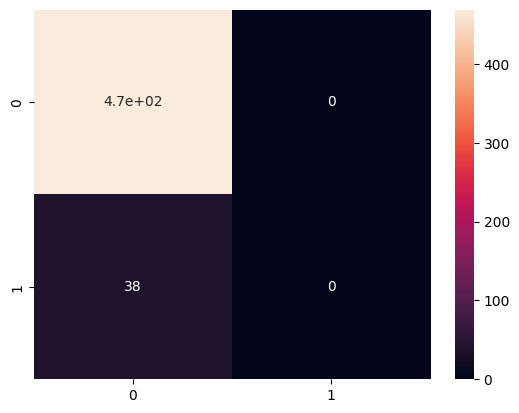

acuracy: 0.9250493096646942
precision: 0.8557162253111275
recall 0.9250493096646942
 
 


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:189: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:189: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



ValueError: Solver produced non-finite parameter weights. The input data may contain large values and need to be preprocessed.

In [70]:
from sklearn.neural_network import MLPClassifier

activations=("identity","logistic","tanh","relu")
solvers=("lbfgs","sgd","adam")

for i in range(0,3):
  for j in range(0,2):
   act=activations[i]
   sol=solvers[j]
   classifier = MLPClassifier(hidden_layer_sizes=(150,100,50),
                              max_iter=1000,
                              activation = act ,
                              solver=sol ,
                              random_state=1)
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_test)

   matriz = confusion_matrix(y_test, y_pred)
   print (activations[i],solvers[j])
   print('Matriz de Confusión')
   sn.heatmap(matriz, annot=True)
   plt.show()

    #accuracy
   print("acuracy:", accuracy_score(y_test, y_pred))
    #precision score
   print("precision:", precision_score(y_test, y_pred,average='weighted'))
    #recall score
   print("recall" , metrics.recall_score(y_test,y_pred,average='weighted'))
   print(" ")
   print(" ")

Ninguno me funciona bien, no se predice ningún 1


--------------------------------------------------------------------

In [ ]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=10000000,activation ="logistic",solver="lbfgs",random_state=1)
classifier.fit(X_train, y_train)


# activations=("identity","logistic","tanh","relu")
# solvers=("lbfgs","sgd","adam")

In [ ]:
y_pred = classifier.predict(X_test)
# print(y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
print(cm)

In [ ]:
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=100000000,activation = "identity" ,solver='lbfgs',random_state=1)
classifier.fit(X_train, y_train)

--------------------------------


In [ ]:
X = df.iloc[:, [36]].values
# X = df[['Income']]
# X = df[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
#        'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
#        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
#        'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
#        'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp1',
#        'AcceptedCmp2', 'Complain', 'Response','clusters_km2', 'clusters_km3', 'clusters_MS']]
y = df.iloc[:, 18].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [ ]:
import tensorflow as tf

In [ ]:
capa=tf.keras.layers.Dense(units=1,input_shape=[1])
modelo =tf.keras.Sequential([capa])

In [ ]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss="mean_squared_error"
)

In [ ]:
historial=modelo.fit(X_train,y_train,epochs=1000, verbose=False)

In [ ]:
plt.xlabel("#Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:
y_pred = (y_pred > 1).astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
print(cm)